In [1643]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [1644]:
real_data = pd.read_csv('1.04.+Real-life+example.csv')

In [1645]:
real_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [1646]:
real_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [1647]:
real_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [1648]:
full_data = real_data.dropna(axis=0)

In [1649]:
full_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


C:\Users\efeba\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

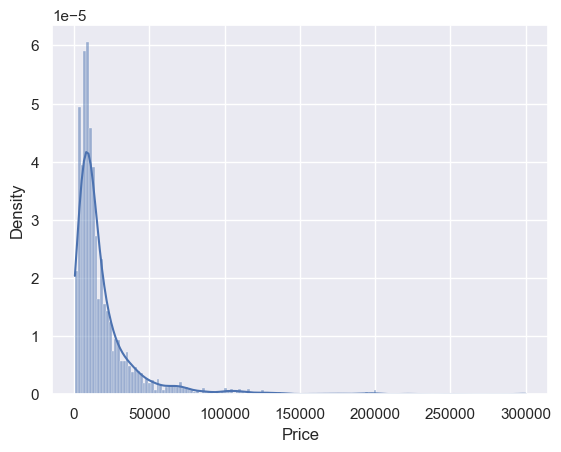

In [1650]:
sns.histplot(full_data["Price"], kde=True, stat="density")

In [1651]:
q = full_data['Price'].quantile(0.99)
full_data_1 = full_data[full_data['Price']<q]
full_data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000,3984
unique,7,NaN,6,NaN,NaN,4,2,NaN,302
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN,188
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922,NaN
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000,NaN
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


C:\Users\efeba\AppData\Local\Temp\ipykernel_7752\2282535530.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(full_data_1['Price'])
C:\Users\efeba\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

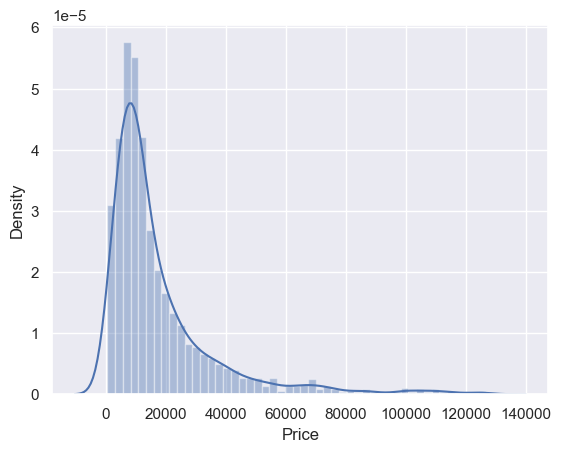

In [1652]:
sns.distplot(full_data_1['Price'])

In [1653]:
p = full_data_1["Mileage"].quantile(0.99)
full_data_2 = full_data_1[full_data_1["Mileage"]<p]

C:\Users\efeba\AppData\Local\Temp\ipykernel_7752\3765884866.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(full_data_2["Mileage"])
C:\Users\efeba\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Mileage', ylabel='Density'>

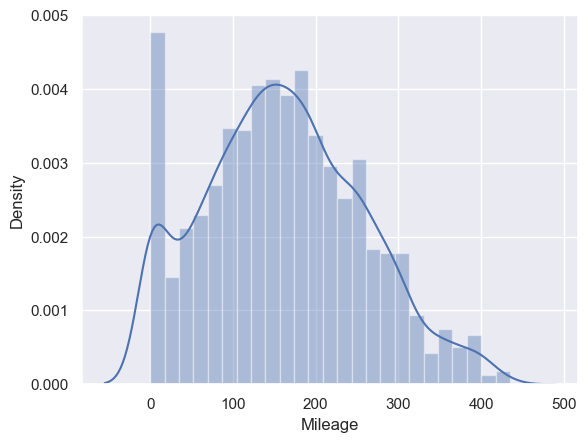

In [1654]:
sns.distplot(full_data_2["Mileage"])

C:\Users\efeba\AppData\Local\Temp\ipykernel_7752\3804306461.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(full_data["EngineV"])
C:\Users\efeba\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='EngineV', ylabel='Density'>

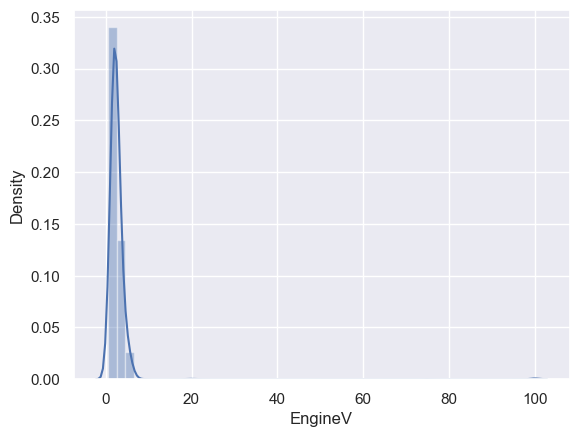

In [1655]:
sns.distplot(full_data["EngineV"])

In [1656]:
Engine=pd.DataFrame(real_data['EngineV'])
Engine=Engine.dropna(axis=0)

In [1657]:
Engine.sort_values(by='EngineV')

,EngineV
2512,0.60
188,0.65
3295,1.00
2725,1.00
1923,1.00
...,...
1311,99.99
3114,99.99
1264,99.99
3641,99.99


In [1658]:
full_data_3 = full_data_2[full_data_2['EngineV']<6.5]

C:\Users\efeba\AppData\Local\Temp\ipykernel_7752\4001564684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(full_data_3['EngineV'])
C:\Users\efeba\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='EngineV', ylabel='Density'>

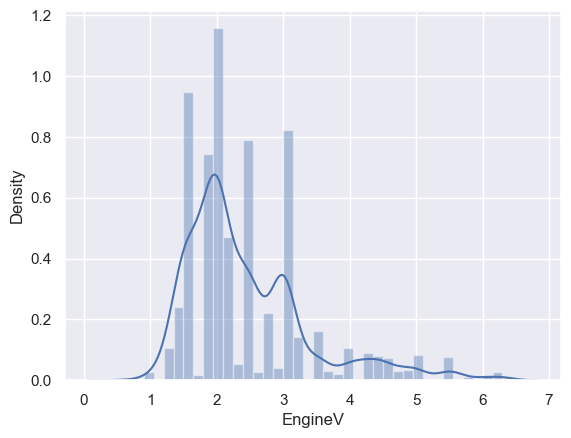

In [1659]:
sns.distplot(full_data_3['EngineV'])

C:\Users\efeba\AppData\Local\Temp\ipykernel_7752\1822047974.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(full_data['Year'])
C:\Users\efeba\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Density'>

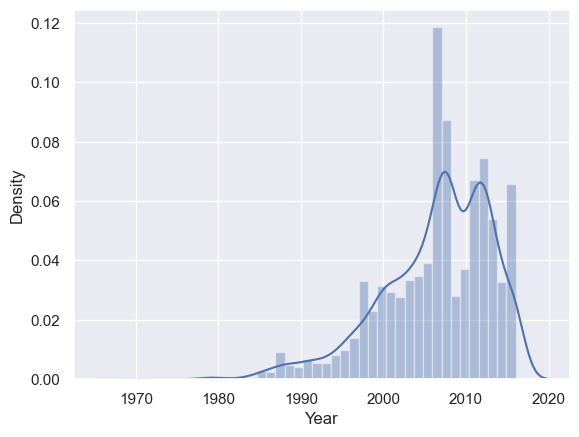

In [1660]:
sns.distplot(full_data['Year'])

In [1661]:
m = full_data_3['Year'].quantile(0.01)
full_data_4 = full_data_3[full_data_3['Year']>m]  #we should remove left side

C:\Users\efeba\AppData\Local\Temp\ipykernel_7752\2835954483.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(full_data_4['Year'])
C:\Users\efeba\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Density'>

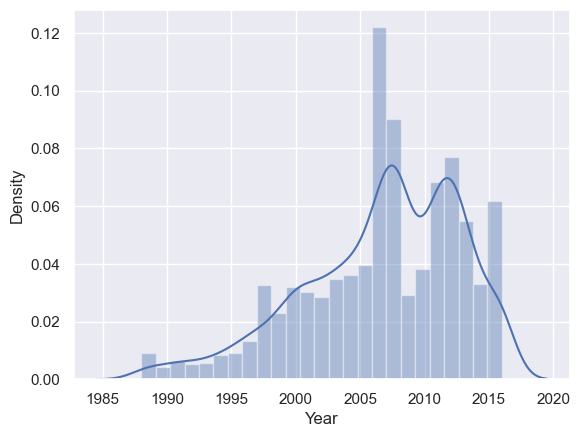

In [1662]:
sns.distplot(full_data_4['Year'])

In [1700]:
cleaned_data = full_data_4.reset_index(drop=True)
cleaned_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535


In [1664]:
cleaned_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,NaN
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


In [1665]:
cleaned_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


CHECKING OLS ASSUMPTIONS

C:\Users\efeba\AppData\Local\Temp\ipykernel_7752\590189951.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_data['Price'])
C:\Users\efeba\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

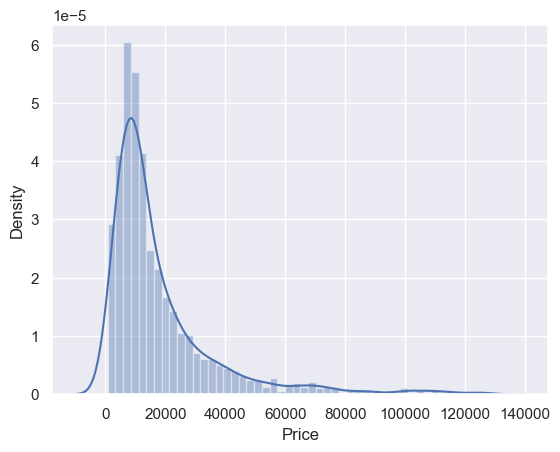

In [1666]:
sns.distplot(cleaned_data['Price'])

In [1667]:
#It is exponentially distributed so we should apply log transformation.

In [1668]:
log_price = np.log(cleaned_data['Price'])
cleaned_data['log_price'] = log_price
cleaned_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557


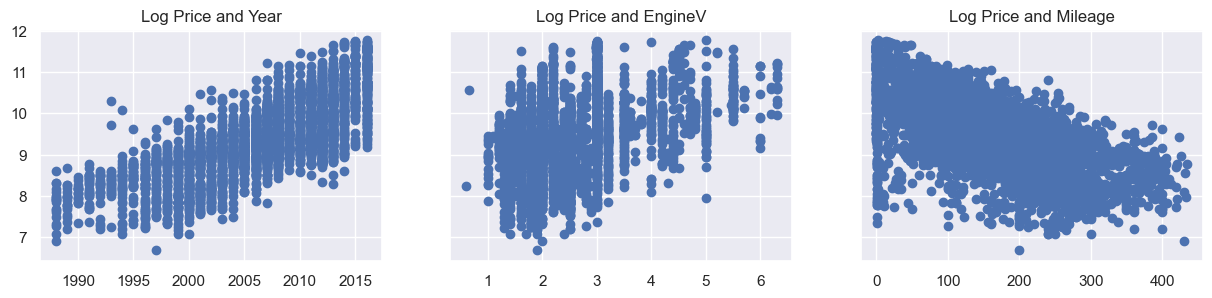

In [1669]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))

ax1.scatter(cleaned_data['Year'],cleaned_data['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(cleaned_data['EngineV'],cleaned_data['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(cleaned_data['Mileage'],cleaned_data['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

In [1670]:
cleaned_data = cleaned_data.drop(['Price'], axis=1)
cleaned_data = cleaned_data.drop(['Model'], axis=1)

In [1671]:
cleaned_data.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

CHECKING MULTICOLLINEARITY

In [1672]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = cleaned_data[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['Features'] = variables.columns
vif_values = []

for i in range(len(variables.columns)) :
    vif_value = variance_inflation_factor(variables.values, i)
    vif_values.append(vif_value)

vif['VIF'] = vif_values


In [1673]:
vif

,Features,VIF
0,Mileage,3.791584
1,Year,10.354854
2,EngineV,7.662068


In [1674]:
cleaned_data

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


DUMMY VARIABLES

In [1675]:
dummy_data = pd.get_dummies(cleaned_data, drop_first=True)
#we dropped audi to get better results
dummy_data = dummy_data.astype(float)

In [1676]:
dummy_data.head()

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277.0,2.0,1991.0,8.342840,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,427.0,2.9,1999.0,8.974618,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,358.0,5.0,2003.0,9.495519,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,240.0,4.2,2007.0,10.043249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,120.0,2.0,2011.0,9.814656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


REGRESSION

In [1677]:
preprocessed_data = dummy_data
targets = preprocessed_data['log_price']
inputs = preprocessed_data.drop(['log_price'], axis=1) #input must be without dependent variable

SCALING

In [1678]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [1679]:
scaled_inputs = scaler.transform(inputs)

TRAIN TEST SPLIT

In [1680]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(scaled_inputs,targets, test_size=0.2, random_state=365)

CREATING THE REGRESSION

In [1681]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [1682]:
y_hat = reg.predict(x_train)

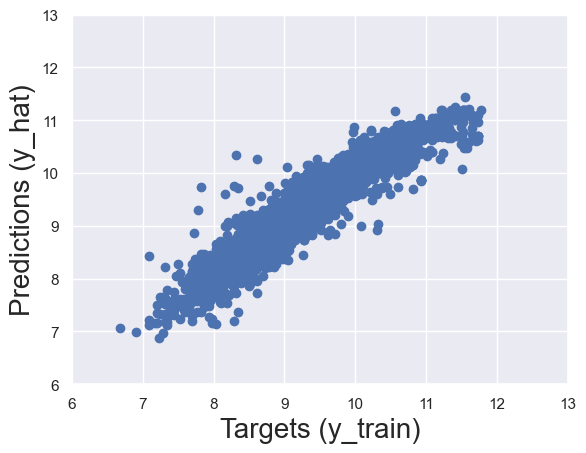

In [1683]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=20)
plt.ylabel('Predictions (y_hat)',size=20)

plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Users\efeba\AppData\Local\Temp\ipykernel_7752\243424188.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diff)
C:\Users\efeba\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Residuals')

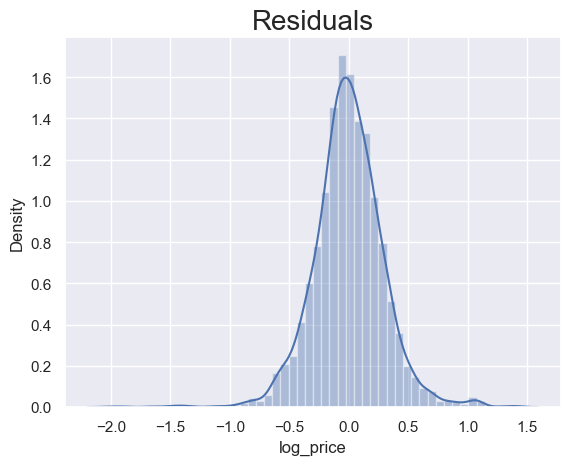

In [1684]:
diff = y_train-y_hat
sns.distplot(diff)
plt.title("Residuals", size=20)

In [1685]:
#there are a lot of negative values.This means that predictions are much higher than targets.

In [1686]:
#R-squared
r2 = reg.score(x_train,y_train)
r2

0.8849485492094937

In [1687]:
def adj_r2() :
    n = len(y_train)
    p = x_train.shape[1]
    adj_r2 = 1-(1-r2)*(n-1/n-p-1)
    return adj_r2

In [1688]:
#bias of regression
reg.intercept_

9.415379879770514

In [1689]:
coefficients = reg.coef_
formatted_coefficients = ['{:.4f}'.format(coef) for coef in coefficients.flatten()]

formatted_coefficients

['-0.1083',
 '0.2189',
 '0.5070',
 '0.0258',
 '0.0027',
 '-0.1340',
 '-0.2043',
 '-0.0781',
 '-0.1032',
 '-0.0931',
 '-0.0759',
 '-0.1418',
 '-0.0980',
 '-0.1580',
 '-0.0430',
 '-0.0185',
 '-0.0600',
 '0.2550']

In [1690]:
summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
summary['Weights'] = formatted_coefficients
summary

,Features,Weights
0,Mileage,-0.1083
1,EngineV,0.2189
2,Year,0.5070
3,Brand_BMW,0.0258
4,Brand_Mercedes-Benz,0.0027
5,Brand_Mitsubishi,-0.1340
6,Brand_Renault,-0.2043
7,Brand_Toyota,-0.0781
8,Brand_Volkswagen,-0.1032
9,Body_hatch,-0.0931


FEATURE SELECTION

In [1691]:
from sklearn.feature_selection import f_regression

In [1692]:
f_regression(x_train,y_train)

(array([1746.00705743,  634.2570563 , 3721.26065592,   24.04611212,
          69.48019914,   25.97005852,  159.47516673,   72.39667638,
          35.42385078,   57.05286203,    6.25385506,   49.26114053,
         114.84734079,   60.31069109,   22.50480612,    5.26552424,
           5.38757601,  818.68593351]),
 array([6.49475128e-303, 1.84779331e-127, 0.00000000e+000, 9.89118757e-007,
        1.14657293e-016, 3.67595093e-007, 1.10396183e-035, 2.70278797e-017,
        2.94981234e-009, 5.55282154e-014, 1.24437077e-002, 2.74224005e-012,
        2.45144747e-026, 1.09348061e-014, 2.19120579e-006, 2.18185920e-002,
        2.03453585e-002, 6.14594532e-160]))

In [1693]:
p_values = f_regression(x_train,y_train)[1]
p_values.round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.012, 0.   , 0.   , 0.   , 0.   , 0.022, 0.02 , 0.   ])

TESTING

In [1694]:
y_hat_test = reg.predict(x_test)

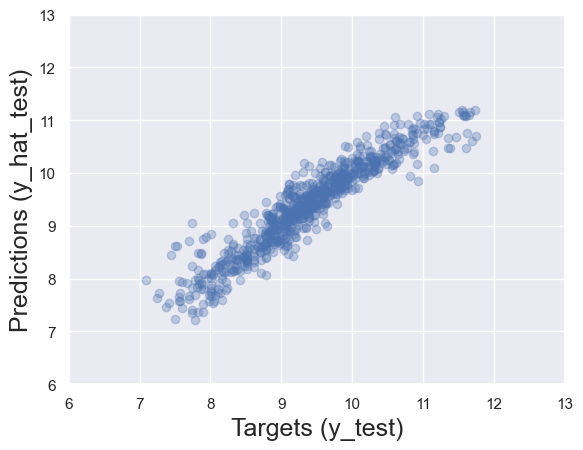

In [1695]:
plt.scatter(y_test, y_hat_test, alpha=0.3)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [1696]:
final_df = pd.DataFrame(np.exp(y_hat_test), columns = ['Prediction'])
y_test = y_test.reset_index(drop=True)
final_df['Target'] = np.exp(y_test)

final_df

,Prediction,Target
0,8518.982858,2300.0
1,3282.274819,2800.0
2,1593.751749,2500.0
3,7141.202337,6400.0
4,8906.586822,9150.0
...,...,...
769,28913.800999,29500.0
770,14257.841065,9600.0
771,18578.036711,18300.0
772,33194.156645,68500.0


In [1697]:
final_df['Residual'] = final_df['Target'] - final_df['Prediction']
final_df['Difference%'] = np.absolute(final_df['Residual']/final_df['Target']*100)

final_df.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
108,6500.529743,6500.0,-0.529743,0.008150
738,24875.400341,24900.0,24.599659,0.098794
79,15716.878034,15700.0,-16.878034,0.107503
16,20526.821451,20500.0,-26.821451,0.130836
323,9917.038866,9900.0,-17.038866,0.172110
...,...,...,...,...
664,4689.730474,1700.0,-2989.730474,175.866498
492,6135.177238,2200.0,-3935.177238,178.871693
629,5525.288955,1850.0,-3675.288955,198.664268
532,5517.949580,1800.0,-3717.949580,206.552754


In [1698]:
final_df = final_df.reset_index(drop=True)

In [1699]:
final_df.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16678.159053,18165.817106,1487.658053,23.303106
std,14067.654521,19967.858908,9745.038154,26.166910
min,1366.558774,1200.000000,-23675.039252,0.008150
25%,6502.797787,6900.000000,-1749.131999,7.738524
50%,12357.260514,11600.000000,59.230623,16.253640
75%,21973.290031,20500.000000,1649.253553,30.146462
max,73147.951567,126000.000000,81495.898963,270.390559
